## SHRINK WRAPPING MACHINE FAILURE PREDICTION

## Objective
The main objective of this project is to develop a predictive model that can forecast failures in a shrink wrapping machine. By predicting failures in advance, we can perform preventive maintenance, thus reducing downtime and associated costs.

**Data and Setup**
**Tools and Libraries**:
Utilized Python libraries such as pandas, numpy, matplotlib, and seaborn for data manipulation and visualization.
Employed machine learning libraries including scikit-learn, imblearn, and tensorflow for building, training, and evaluating predictive models.
Data Source:
The dataset used is loaded from a CSV file named "NewBlade001.csv".

**Data Description**
The dataset contains various features related to the machine's performance over time

**Features**

1. **Timestamp**: This column represents the time at which each measurement or observation was recorded. It is useful for time-series analysis and understanding the sequence of events leading up to a failure.

2. **pCut Motor: Torque**: This column represents the torque exerted by the motor involved in the cutting process of the shrink wrapping machine. Torque is a measure of the rotational force and can indicate the load on the motor, which may be linked to potential mechanical issues or failures.

3. **pCut CTRL Position controller: Lag error**: This column measures the lag error in the position controller of the cutting mechanism. Lag error is the difference between the desired position and the actual position of the component being controlled. High lag errors could indicate issues with the control system or mechanical problems.

4. **pCut CTRL Position controller: Actual position**: This column records the actual position of the cutting mechanism as controlled by the position controller. It helps in assessing how accurately the controller is achieving the desired positions.

5. **pCut CTRL Position controller: Actual speed**: This column represents the actual speed at which the cutting mechanism is moving. Variations in speed can indicate performance issues or deviations from expected behavior.

6. **pSvolFilm CTRL Position controller: Actual position**: This column measures the actual position of the film spool mechanism. Similar to the cutting position, it helps in understanding how well the position controller is functioning for this part of the machine.

7. **pSvolFilm CTRL Position controller: Actual speed**: This column records the actual speed of the film spool mechanism. Consistent speed is essential for maintaining proper tension and alignment of the shrink wrap film.

8. **pSvolFilm CTRL Position controller: Lag error**: This column measures the lag error in the position controller of the film spool mechanism. High lag errors here could indicate issues with film feed or tension control.

9. **failure_likelihood**: This is the target variable indicating the likelihood of a failure occurring in the machine. It is a binary variable where 1 indicates a high likelihood of failure and 0 indicates a low likelihood of failure.


**Their Importance**

1. **Timestamp**: Essential for time-series analysis and understanding the temporal sequence of machine operations.
2. **pCut Motor: Torque**: Critical for assessing the mechanical load on the motor, which can be a precursor to mechanical failure.
3. **pCut CTRL Position controller: Lag error**: Important for evaluating the precision of the cutting mechanism and detecting control system issues.
4. **pCut CTRL Position controller: Actual position**: Helps in verifying the accuracy of the position controller for the cutting mechanism.
5. **pCut CTRL Position controller: Actual speed**: Useful for monitoring the cutting speed and detecting deviations that may indicate problems.
6. **pSvolFilm CTRL Position controller: Actual position**: Key for ensuring the film spool mechanism is positioned correctly, affecting the wrapping quality.
7. **pSvolFilm CTRL Position controller: Actual speed**: Important for maintaining consistent film feed and tension.
8. **pSvolFilm CTRL Position controller: Lag error**: Helps in identifying control issues specific to the film spool mechanism.
9. **failure_likelihood**: The primary indicator of machine health, used to predict and prevent potential failures.

Understanding these features and their relationships is crucial for building effective predictive models that can help in proactive maintenance and reducing downtime in the shrink wrapping machine.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier, BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from scikeras.wrappers import KerasClassifier

- pandas: Used for data manipulation and analysis.
- numpy: Used for numerical operations.
- matplotlib.pyplot: Used for plotting graphs and visualizations.
- seaborn: A data visualization library based on matplotlib.
- SMOTE, RandomOverSampler: Methods for handling imbalanced datasets by oversampling.
- RandomUnderSampler: Method for handling imbalanced datasets by undersampling.
- BalancedRandomForestClassifier, EasyEnsembleClassifier, BalancedBaggingClassifier: Ensemble methods designed for imbalanced datasets.
- tensorflow: A deep learning library.
- Sequential: A linear stack of layers.
- Dense, Dropout: Types of layers in a neural network.
- KerasClassifier: Wraps a Keras model to be compatible with scikit-learn.

### Exploratory Data Analysis

In [2]:
df = pd.read_csv("NewBlade001.csv")

In [3]:
df.head()

,Timestamp,pCut Motor: Torque,pCut CTRL Position controller: Lag error,pCut CTRL Position controller: Actual position,pCut CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Actual position,pSvolFilm CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Lag error
0,-0.188,-0.112131,-0.002490,-884606,0.000000,11128,2.504289,0.261085
1,-0.184,-0.088931,-0.003863,-884606,17.166138,11128,-2.504289,0.260083
2,-0.180,-0.115141,0.001630,-884606,-6.866455,11128,7.513016,0.259081
3,-0.176,-0.111815,0.003003,-884606,-13.732910,11128,-2.504289,0.260083
4,-0.172,-0.130970,0.004376,-884606,-6.866455,11128,0.000000,0.261085


In [4]:
df.tail()

,Timestamp,pCut Motor: Torque,pCut CTRL Position controller: Lag error,pCut CTRL Position controller: Actual position,pCut CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Actual position,pSvolFilm CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Lag error
2043,7.983999,0.438976,-0.023221,-877392,-926.971435,22329,2013.489258,0.643710
2044,7.987999,0.427332,-0.019023,-877396,-933.837891,22337,1968.411133,0.658649
2045,7.991999,0.340527,0.011973,-877400,-930.404663,22344,1993.454224,0.656947
2046,7.995999,0.339946,0.015117,-877403,-916.671753,22352,1980.932495,0.642398
2047,7.999999,0.362959,-0.002546,-877407,-909.805298,22360,2021.002075,0.601142


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 8 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             2048 non-null   float64
 1   pCut Motor: Torque                                    2048 non-null   float64
 2    pCut CTRL Position controller: Lag error             2048 non-null   float64
 3    pCut CTRL Position controller: Actual position       2048 non-null   int64  
 4    pCut CTRL Position controller: Actual speed          2048 non-null   float64
 5    pSvolFilm CTRL Position controller: Actual position  2048 non-null   int64  
 6    pSvolFilm CTRL Position controller: Actual speed     2048 non-null   float64
 7    pSvolFilm CTRL Position controller: Lag error        2048 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 128.1 KB


In [6]:
df.shape

(2048, 8)

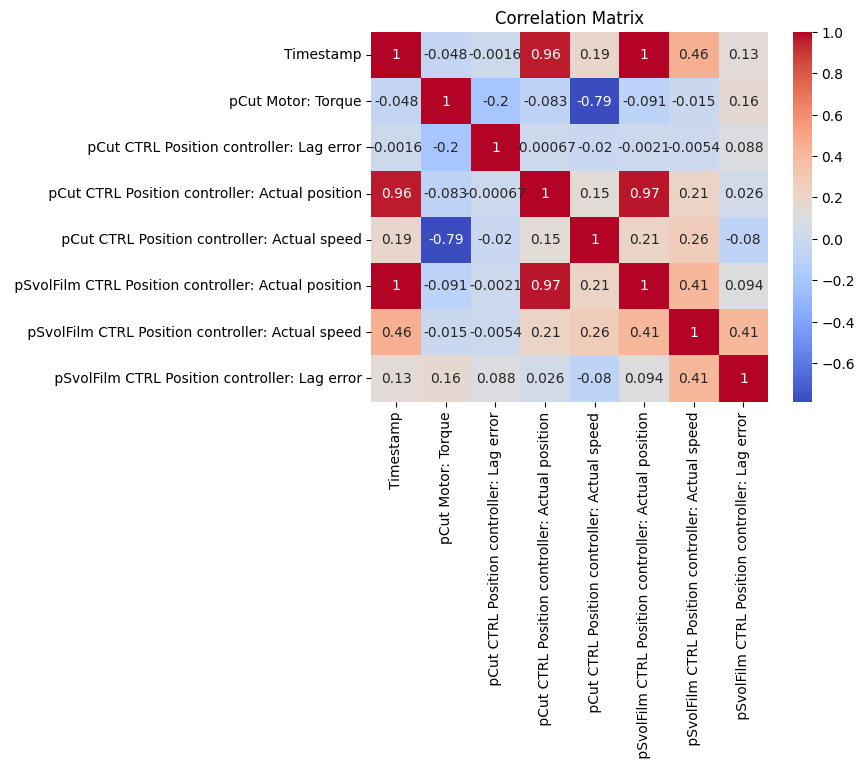

In [7]:
# Check the correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
df.describe()

,Timestamp,pCut Motor: Torque,pCut CTRL Position controller: Lag error,pCut CTRL Position controller: Actual position,pCut CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Actual position,pSvolFilm CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Lag error
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,3.906000,-0.077109,-0.000306,-881592.086426,878.606161,16150.827148,1371.617691,0.646027
std,2.365404,0.372693,0.038205,2661.658773,1317.007966,3597.327988,552.624403,0.085916
min,-0.188000,-2.292097,-0.513631,-884747.000000,-954.437256,11128.000000,-7.513016,0.259081
25%,1.859000,-0.304018,-0.009814,-884346.250000,-172.519684,12420.500000,743.789139,0.612427
50%,3.906000,-0.165394,-0.000182,-881146.000000,449.752808,16047.000000,1389.908569,0.652235
75%,5.953000,0.319277,0.009876,-879821.500000,2059.078125,19591.000000,1968.411042,0.693293
max,7.999999,0.606260,0.346109,-877098.000000,3556.823730,22360.000000,2068.584717,0.869679


In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


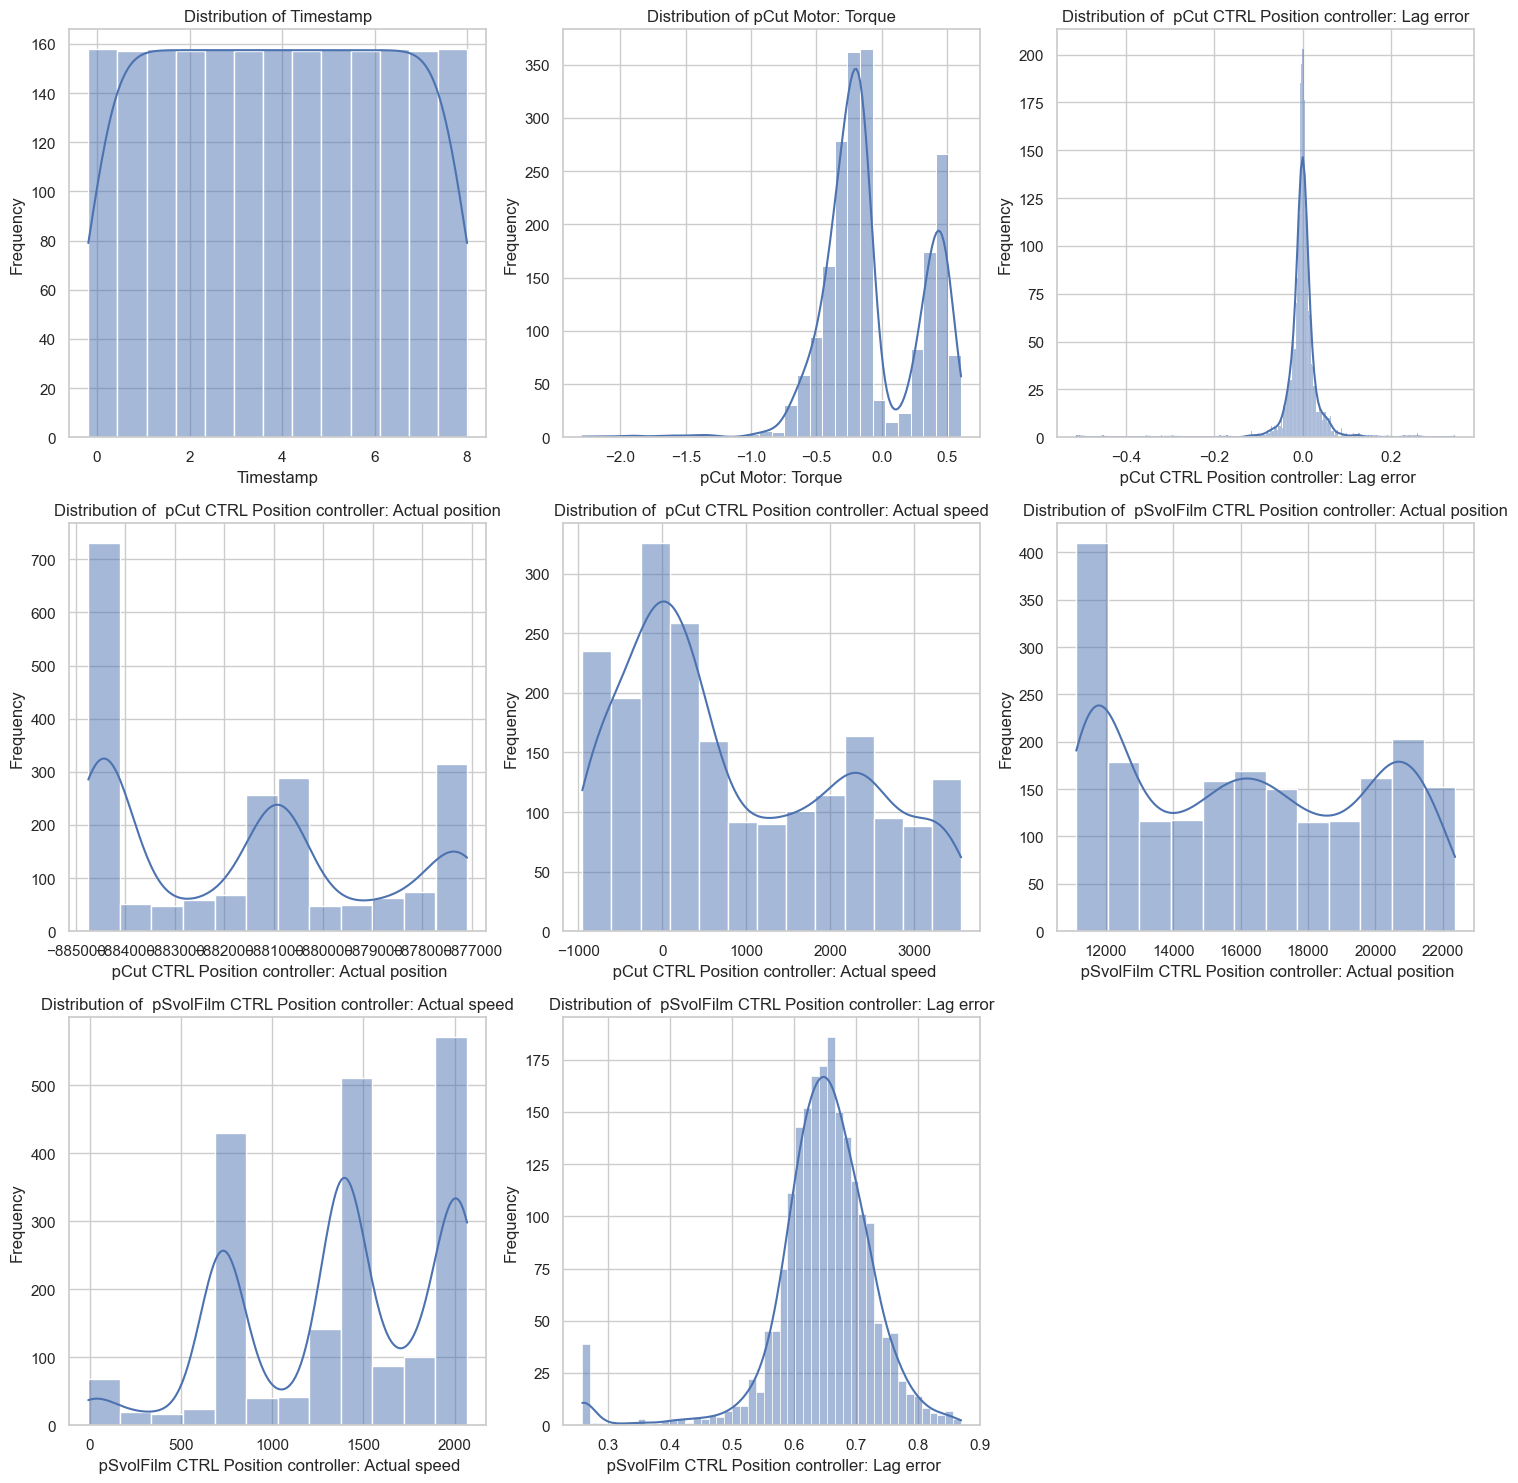

In [10]:
# Set the style for the plots
sns.set(style="whitegrid")

# Define a function to plot the distribution of each feature
def plot_feature_distributions(df):
    num_features = df.shape[1]
    num_cols = 3
    num_rows = (num_features + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        sns.histplot(df[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    # Remove any empty subplots
    for i in range(num_features, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Assuming df is already loaded with the data
plot_feature_distributions(df)

The image displays eight histograms, each representing the distribution of a different variable. 

- The first histogram shows the distribution of timestamps, which appears to be relatively evenly distributed across the range of values.
- The second histogram displays the distribution of pCut motor torque, which appears to be approximately normally distributed with a mean close to zero.
- The third histogram shows the distribution of the pCtrl position controller lag error, which appears to be centered around zero and has a small standard deviation.
- The fourth histogram shows the distribution of the pCtrl position controller actual position, which appears to be normally distributed with a mean around 10000.
- The fifth histogram shows the distribution of the pCtrl position controller actual speed, which appears to be centered around zero and has a small standard deviation.
- The sixth histogram shows the distribution of the pSVofilm position controller actual position, which appears to be normally distributed with a mean around 15000.
- The seventh histogram shows the distribution of the pSVofilm position controller actual speed, which appears to be centered around zero and has a small standard deviation.
- The eighth histogram shows the distribution of the pSVofilm position controller lag error, which appears to be centered around 0.5 and has a small standard deviation.



In [11]:
# Drop rows with negative timestamps
df = df[df['Timestamp'] >= 0]

# Display the cleaned dataframe
df.head()

,Timestamp,pCut Motor: Torque,pCut CTRL Position controller: Lag error,pCut CTRL Position controller: Actual position,pCut CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Actual position,pSvolFilm CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Lag error
47,1.386550e-08,-0.287765,0.002173,-884605,37.765503,11128,25.043337,0.450754
48,4.000014e-03,-0.295928,0.000015,-884605,41.198730,11128,35.060791,0.466406
49,8.000013e-03,-0.283251,-0.006468,-884605,48.065186,11128,32.556355,0.491569
50,1.200001e-02,-0.308639,0.000107,-884605,44.631958,11128,40.069519,0.519276
51,1.600001e-02,-0.331372,0.004387,-884604,51.498413,11129,45.078098,0.545538


There is a need to Transform our data but first let's do some more visualization

In [12]:
# Convert 'Timestamp' to a datetime object
# Assuming the 'Timestamp' represents elapsed time in seconds from a specific starting point
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s', errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, 47 to 2047
Data columns (total 8 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Timestamp                                             2001 non-null   datetime64[ns]
 1   pCut Motor: Torque                                    2001 non-null   float64       
 2    pCut CTRL Position controller: Lag error             2001 non-null   float64       
 3    pCut CTRL Position controller: Actual position       2001 non-null   int64         
 4    pCut CTRL Position controller: Actual speed          2001 non-null   float64       
 5    pSvolFilm CTRL Position controller: Actual position  2001 non-null   int64         
 6    pSvolFilm CTRL Position controller: Actual speed     2001 non-null   float64       
 7    pSvolFilm CTRL Position controller: Lag error        2001 non-null   float64      

In [14]:
df.columns

Index(['Timestamp', 'pCut Motor: Torque',
       ' pCut CTRL Position controller: Lag error',
       ' pCut CTRL Position controller: Actual position',
       ' pCut CTRL Position controller: Actual speed',
       ' pSvolFilm CTRL Position controller: Actual position',
       ' pSvolFilm CTRL Position controller: Actual speed',
       ' pSvolFilm CTRL Position controller: Lag error'],
      dtype='object')

In [15]:
# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()
df.columns

Index(['Timestamp', 'pCut Motor: Torque',
       'pCut CTRL Position controller: Lag error',
       'pCut CTRL Position controller: Actual position',
       'pCut CTRL Position controller: Actual speed',
       'pSvolFilm CTRL Position controller: Actual position',
       'pSvolFilm CTRL Position controller: Actual speed',
       'pSvolFilm CTRL Position controller: Lag error'],
      dtype='object')

### Data Visualization

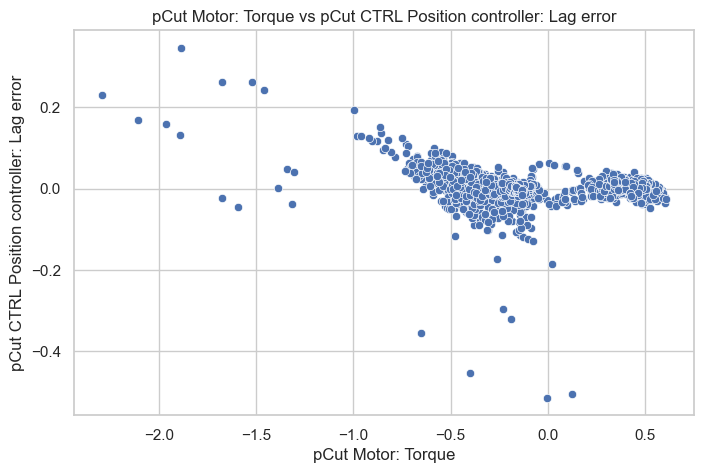

In [16]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='pCut Motor: Torque', y='pCut CTRL Position controller: Lag error', data=df)

# Add titles and labels
plt.title('pCut Motor: Torque vs pCut CTRL Position controller: Lag error')
plt.xlabel('pCut Motor: Torque')
plt.ylabel('pCut CTRL Position controller: Lag error')

# Show the plot
plt.show()

The data points above generally shows a negative linear relationship, indicating that as the pCut Motor Torque increases, the pCut CTRL Position Controller Lag Error decreases. 
This relationship is particularly strong in the range of pCut Motor Torque values between -1.0 and 0.5. However, there are some outlier data points that deviate from this trend, particularly at the higher end of the pCut Motor Torque range.

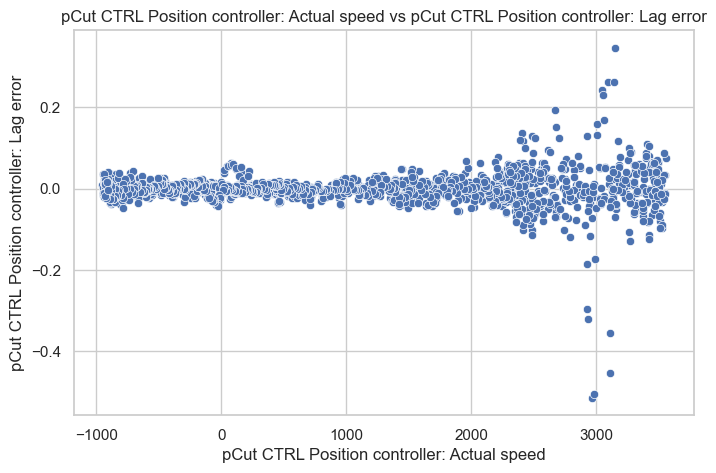

In [17]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='pCut CTRL Position controller: Actual speed', y='pCut CTRL Position controller: Lag error', data=df)

# Add titles and labels
plt.title('pCut CTRL Position controller: Actual speed vs pCut CTRL Position controller: Lag error')
plt.xlabel('pCut CTRL Position controller: Actual speed')
plt.ylabel('pCut CTRL Position controller: Lag error')

# Show the plot
plt.show()

The data points above are generally clustered around the y-axis, indicating that the pCut CTRL Position Controller Lag Error is relatively constant regardless of the Actual Speed. 
There are a few outlier data points that deviate from this trend, particularly at higher values of Actual Speed. The data points suggest a weak relationship between Actual Speed and Lag Error.

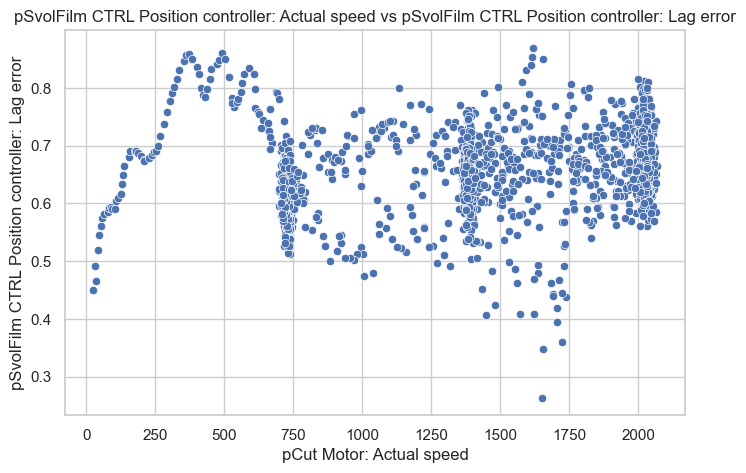

In [18]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='pSvolFilm CTRL Position controller: Actual speed', y='pSvolFilm CTRL Position controller: Lag error', data=df)

# Add titles and labels
plt.title('pSvolFilm CTRL Position controller: Actual speed vs pSvolFilm CTRL Position controller: Lag error')
plt.xlabel('pCut Motor: Actual speed')
plt.ylabel('pSvolFilm CTRL Position controller: Lag error')

# Show the plot
plt.show()

The image shows a scatter plot depicting the relationship between pSvolFilm CTRL Position controller Actual Speed and pSvolFilm CTRL Position controller Lag Error. 

The data points generally cluster in three distinct regions. There is a cluster of data points with pSvolFilm CTRL Position controller Actual Speed between 0 and 200 and pSvolFilm CTRL Position controller Lag Error between 0.5 and 0.7. Another cluster of data points is between pSvolFilm CTRL Position controller Actual Speed between 500 and 700 and pSvolFilm CTRL Position controller Lag Error between 0.7 and 0.8. Lastly, the third cluster is between pSvolFilm CTRL Position controller Actual Speed between 1700 and 2000 and pSvolFilm CTRL Position controller Lag Error between 0.5 and 0.7. This suggests a non-linear relationship between the variables, possibly with a trend of increasing Lag Error with increasing Actual Speed. 



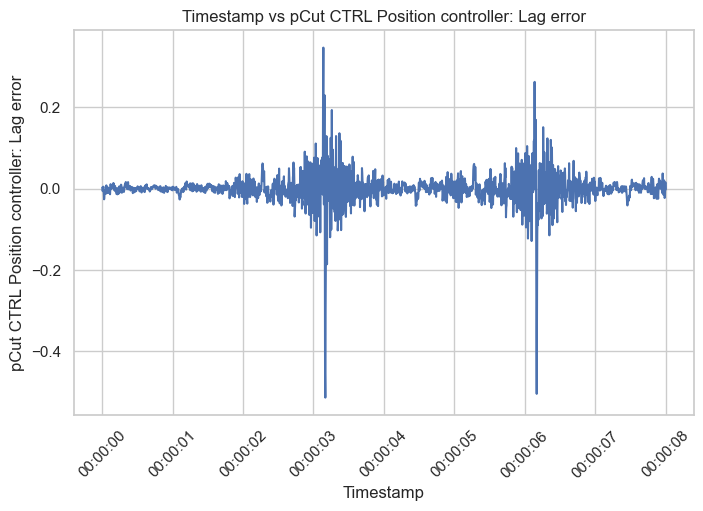

In [19]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the time series plot
plt.figure(figsize=(8, 5))
sns.lineplot(x='Timestamp', y='pCut CTRL Position controller: Lag error', data=df)

# Add titles and labels
plt.title('Timestamp vs pCut CTRL Position controller: Lag error')
plt.xlabel('Timestamp')
plt.ylabel('pCut CTRL Position controller: Lag error')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

The graph above shows a line graph depicting the relationship between timestamp and pCut CTRL Position controller lag error. The x-axis represents the timestamp, while the y-axis represents the pCut CTRL Position controller lag error. 

The graph shows that the lag error is generally stable around zero until approximately 00:00:03 and 00:00:06, where it experiences a sharp spike, reaching a maximum value of around 0.3 before returning to its stable state around zero. 

The timestamps are used to track when each lag error measurement was recorded. They do not represent the duration of the lag error itself, but rather when each individual lag error value was captured

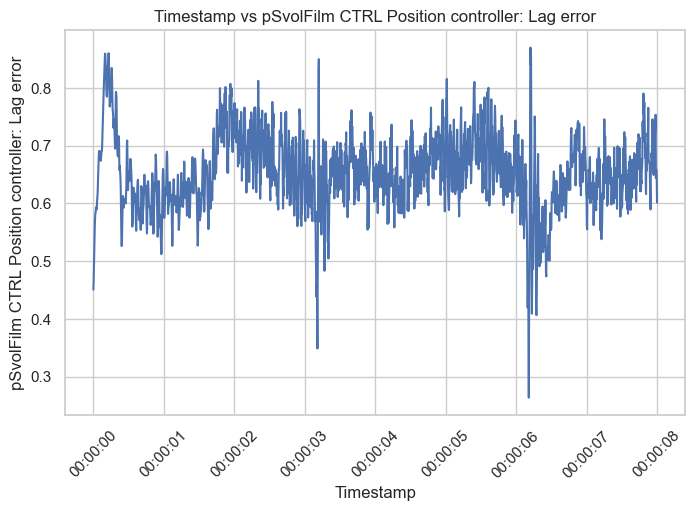

In [20]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the time series plot
plt.figure(figsize=(8, 5))
sns.lineplot(x='Timestamp', y='pSvolFilm CTRL Position controller: Lag error', data=df)

# Add titles and labels
plt.title('Timestamp vs pSvolFilm CTRL Position controller: Lag error')
plt.xlabel('Timestamp')
plt.ylabel('pSvolFilm CTRL Position controller: Lag error')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

The graph above shows a line graph depicting the relationship between timestamp and pSvolFilm CTRL Position controller lag error. The x-axis represents the timestamp, while the y-axis represents the pSvolFilm CTRL Position controller lag error.

The graph shows that the lag error is generally stable around zero until approximately 00:00:03 and 00:00:06, where it experiences a sharp spike, reaching a maximum value of around 0.3 before returning to its stable state around zero.

The timestamps are used to track when each lag error measurement was recorded. They do not represent the duration of the lag error itself, but rather when each individual lag error value was captured

In [21]:
# Drop 'Timestamp' from the features to scale
features_to_scale = df.drop(columns=['Timestamp']).columns
features_to_scale 

Index(['pCut Motor: Torque', 'pCut CTRL Position controller: Lag error',
       'pCut CTRL Position controller: Actual position',
       'pCut CTRL Position controller: Actual speed',
       'pSvolFilm CTRL Position controller: Actual position',
       'pSvolFilm CTRL Position controller: Actual speed',
       'pSvolFilm CTRL Position controller: Lag error'],
      dtype='object')

### Data Pre-processing

In [22]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_to_scale])

In [23]:
# Create a new DataFrame for the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)
scaled_df.head()

,pCut Motor: Torque,pCut CTRL Position controller: Lag error,pCut CTRL Position controller: Actual position,pCut CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Actual position,pSvolFilm CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Lag error
0,-0.563232,0.066315,-1.163130,-0.650059,-1.446436,-2.666603,-3.121038
1,-0.584898,0.010442,-1.163130,-0.647468,-1.446436,-2.647228,-2.881454
2,-0.551249,-0.157399,-1.163130,-0.642286,-1.446436,-2.652072,-2.496280
3,-0.618639,0.012812,-1.163130,-0.644877,-1.446436,-2.637541,-2.072160
4,-0.678981,0.123620,-1.162753,-0.639695,-1.446155,-2.627854,-1.670160


In [24]:
scaled_df.tail()

,pCut Motor: Torque,pCut CTRL Position controller: Lag error,pCut CTRL Position controller: Actual position,pCut CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Actual position,pSvolFilm CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Lag error
1996,1.365851,-0.591130,1.557513,-1.378095,1.705119,1.179224,-0.167417
1997,1.334943,-0.482432,1.556004,-1.383276,1.707370,1.092039,0.061252
1998,1.104526,0.320026,1.554495,-1.380686,1.709340,1.140475,0.035199
1999,1.102982,0.401404,1.553364,-1.370322,1.711590,1.116257,-0.187508
2000,1.164070,-0.055858,1.551855,-1.365140,1.713841,1.193755,-0.819024


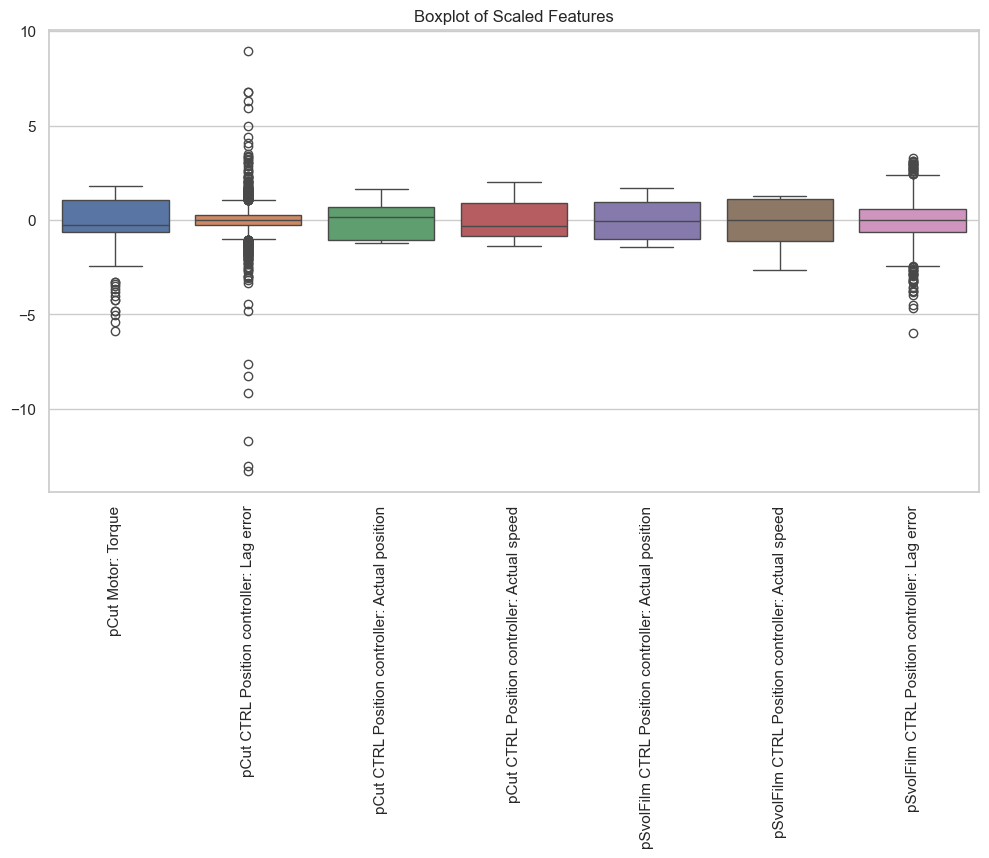

In [25]:
# Create a boxplot for the scaled features
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df)
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.title('Boxplot of Scaled Features')
plt.show()

In [26]:
# Calculate the Z-scores for each feature
z_scores = np.abs(scaled_df)
threshold = 3

# Identify outliers
outliers = z_scores > threshold

# Count the number of outliers in each feature
outlier_counts = outliers.sum()

print("Number of outliers in each feature:")
print(outlier_counts)

Number of outliers in each feature:
pCut Motor: Torque                                     14
pCut CTRL Position controller: Lag error               30
pCut CTRL Position controller: Actual position          0
pCut CTRL Position controller: Actual speed             0
pSvolFilm CTRL Position controller: Actual position     0
pSvolFilm CTRL Position controller: Actual speed        0
pSvolFilm CTRL Position controller: Lag error          20
dtype: int64


In [27]:
# Identify rows with any feature having a Z-score greater than the threshold
rows_with_outliers = outliers.any(axis=1)

# Count the number of rows with outliers
num_rows_with_outliers = rows_with_outliers.sum()
print(f"Number of rows with at least one outlier: {num_rows_with_outliers}")

Number of rows with at least one outlier: 49


In [28]:
# Drop rows with outliers
scaled_df_no_outliers = scaled_df[~rows_with_outliers].reset_index(drop=True)

# Display the dataframe without outliers
print(f"Original dataframe shape: {scaled_df_no_outliers.shape}")

Original dataframe shape: (1952, 7)


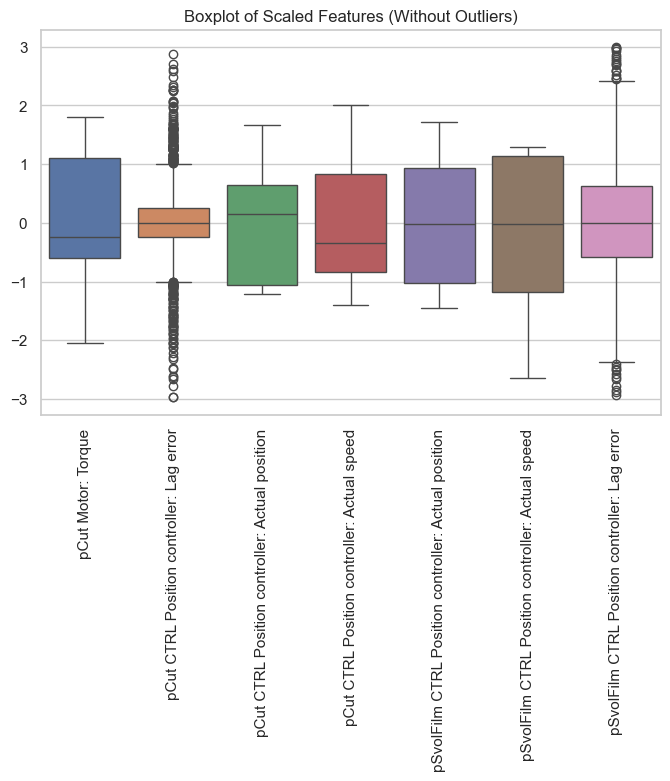

In [29]:
# Create a boxplot for the scaled features after removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=scaled_df_no_outliers)
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.title('Boxplot of Scaled Features (Without Outliers)')
plt.show()

In [30]:
# Reset the index of the original dataframe
df.reset_index(drop=True, inplace=True)

# Verify the change
df.head()

,Timestamp,pCut Motor: Torque,pCut CTRL Position controller: Lag error,pCut CTRL Position controller: Actual position,pCut CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Actual position,pSvolFilm CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Lag error
0,1970-01-01 00:00:00.000000014,-0.287765,0.002173,-884605,37.765503,11128,25.043337,0.450754
1,1970-01-01 00:00:00.004000013,-0.295928,0.000015,-884605,41.198730,11128,35.060791,0.466406
2,1970-01-01 00:00:00.008000013,-0.283251,-0.006468,-884605,48.065186,11128,32.556355,0.491569
3,1970-01-01 00:00:00.012000013,-0.308639,0.000107,-884605,44.631958,11128,40.069519,0.519276
4,1970-01-01 00:00:00.016000013,-0.331372,0.004387,-884604,51.498413,11129,45.078098,0.545538


In [31]:
# Assign the scaled features back to the original dataframe, preserving 'Timestamp'
df[features_to_scale] = scaled_df_no_outliers
df.head()

,Timestamp,pCut Motor: Torque,pCut CTRL Position controller: Lag error,pCut CTRL Position controller: Actual position,pCut CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Actual position,pSvolFilm CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Lag error
0,1970-01-01 00:00:00.000000014,-0.584898,0.010442,-1.163130,-0.647468,-1.446436,-2.647228,-2.881454
1,1970-01-01 00:00:00.004000013,-0.551249,-0.157399,-1.163130,-0.642286,-1.446436,-2.652072,-2.496280
2,1970-01-01 00:00:00.008000013,-0.618639,0.012812,-1.163130,-0.644877,-1.446436,-2.637541,-2.072160
3,1970-01-01 00:00:00.012000013,-0.678981,0.123620,-1.162753,-0.639695,-1.446155,-2.627854,-1.670160
4,1970-01-01 00:00:00.016000013,-0.719831,0.115226,-1.162753,-0.629332,-1.446155,-2.613323,-1.428411


In [32]:
df.tail()

,Timestamp,pCut Motor: Torque,pCut CTRL Position controller: Lag error,pCut CTRL Position controller: Actual position,pCut CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Actual position,pSvolFilm CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Lag error
1996,1970-01-01 00:00:07.983999464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,1970-01-01 00:00:07.987999463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,1970-01-01 00:00:07.991999463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,1970-01-01 00:00:07.995999463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,1970-01-01 00:00:07.999999463,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.isnull().sum()

Timestamp                                               0
pCut Motor: Torque                                     49
pCut CTRL Position controller: Lag error               49
pCut CTRL Position controller: Actual position         49
pCut CTRL Position controller: Actual speed            49
pSvolFilm CTRL Position controller: Actual position    49
pSvolFilm CTRL Position controller: Actual speed       49
pSvolFilm CTRL Position controller: Lag error          49
dtype: int64

In [34]:
df = df.dropna()
df.isnull().sum()

Timestamp                                              0
pCut Motor: Torque                                     0
pCut CTRL Position controller: Lag error               0
pCut CTRL Position controller: Actual position         0
pCut CTRL Position controller: Actual speed            0
pSvolFilm CTRL Position controller: Actual position    0
pSvolFilm CTRL Position controller: Actual speed       0
pSvolFilm CTRL Position controller: Lag error          0
dtype: int64

In [35]:
df.describe()

,Timestamp,pCut Motor: Torque,pCut CTRL Position controller: Lag error,pCut CTRL Position controller: Actual position,pCut CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Actual position,pSvolFilm CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Lag error
count,1952,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,1970-01-01 00:00:03.901999744,0.049759,0.004667,-0.005432,-0.034061,-0.007115,-0.006376,0.034196
min,1970-01-01 00:00:00.000000014,-2.045572,-2.972644,-1.216691,-1.398822,-1.446436,-2.652072,-2.933259
25%,1970-01-01 00:00:01.950999879,-0.592111,-0.246792,-1.061007,-0.829477,-1.032480,-1.182036,-0.585330
50%,1970-01-01 00:00:03.901999745,-0.236185,0.000332,0.145140,-0.339154,-0.026534,-0.026835,0.001060
75%,1970-01-01 00:00:05.852999610,1.098728,0.259716,0.635859,0.831922,0.932494,1.141686,0.625936
max,1970-01-01 00:00:07.803999476,1.809893,2.871116,1.668405,2.005589,1.713841,1.285784,2.990027
std,NaN,0.925110,0.634275,1.004892,0.984913,1.002864,1.004693,0.925587


### Feature Engineering

#### Setting Thresholds and Creating failure_likelihood feature

In [36]:
# Extract mean and standard deviation from describe() output
mean_values = df.mean()
std_values = df.std()

# Set thresholds as a multiple of standard deviations from the mean
torque_threshold = mean_values['pCut Motor: Torque'] + 1.5 * std_values['pCut Motor: Torque']
lag_error_threshold = mean_values['pCut CTRL Position controller: Lag error'] + 1.5 * std_values['pCut CTRL Position controller: Lag error']

# Create the failure_likelihood feature
df['failure_likelihood'] = ((df['pCut Motor: Torque'] > torque_threshold) |
                            (df['pCut CTRL Position controller: Lag error'] > lag_error_threshold) |
                            (df['pSvolFilm CTRL Position controller: Lag error'] > lag_error_threshold)).astype(int)

# Display the updated dataframe
df.head()

,Timestamp,pCut Motor: Torque,pCut CTRL Position controller: Lag error,pCut CTRL Position controller: Actual position,pCut CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Actual position,pSvolFilm CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Lag error,failure_likelihood
0,1970-01-01 00:00:00.000000014,-0.584898,0.010442,-1.163130,-0.647468,-1.446436,-2.647228,-2.881454,0
1,1970-01-01 00:00:00.004000013,-0.551249,-0.157399,-1.163130,-0.642286,-1.446436,-2.652072,-2.496280,0
2,1970-01-01 00:00:00.008000013,-0.618639,0.012812,-1.163130,-0.644877,-1.446436,-2.637541,-2.072160,0
3,1970-01-01 00:00:00.012000013,-0.678981,0.123620,-1.162753,-0.639695,-1.446155,-2.627854,-1.670160,0
4,1970-01-01 00:00:00.016000013,-0.719831,0.115226,-1.162753,-0.629332,-1.446155,-2.613323,-1.428411,0


In [37]:
# Calculate value counts of failure_likelihood
failure_likelihood_counts = df['failure_likelihood'].value_counts()
failure_likelihood_counts

failure_likelihood
0    1363
1     589
Name: count, dtype: int64

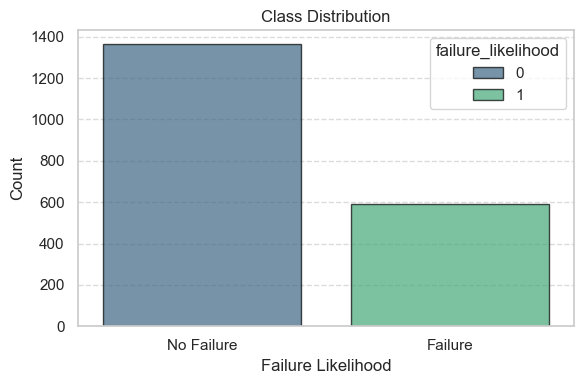

In [38]:
# Plot bar chart of failure_likelihood
plt.figure(figsize=(6, 4))
sns.barplot(x=failure_likelihood_counts.index, hue=failure_likelihood_counts.index, y=failure_likelihood_counts.values, 
           palette='viridis', edgecolor='black', alpha=0.7)
plt.xlabel('Failure Likelihood')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1], ['No Failure', 'Failure'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
df.dtypes

Timestamp                                              datetime64[ns]
pCut Motor: Torque                                            float64
pCut CTRL Position controller: Lag error                      float64
pCut CTRL Position controller: Actual position                float64
pCut CTRL Position controller: Actual speed                   float64
pSvolFilm CTRL Position controller: Actual position           float64
pSvolFilm CTRL Position controller: Actual speed              float64
pSvolFilm CTRL Position controller: Lag error                 float64
failure_likelihood                                              int32
dtype: object

In [40]:
# Assuming X and y are your features and target variable respectively
X = df.drop(columns=['Timestamp', 'failure_likelihood'])
y = df['failure_likelihood']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [41]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

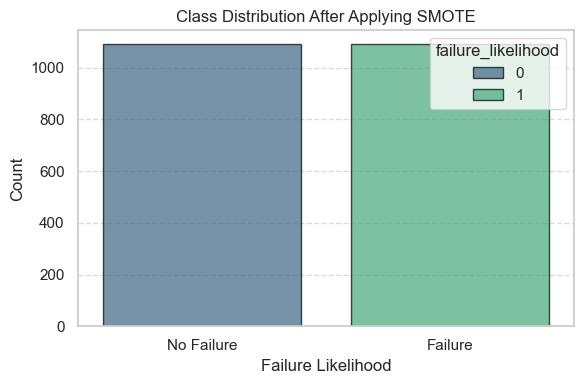

In [42]:
# Plot Bar Chart of Class Distribution After SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled, hue=y_train_resampled, palette='viridis', edgecolor='black', alpha=0.7)
plt.xlabel('Failure Likelihood')
plt.ylabel('Count')
plt.title('Class Distribution After Applying SMOTE')
plt.xticks([0, 1], ['No Failure', 'Failure'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Model Building and Evaluation

In [43]:
# Train a model (e.g., Random Forest classifier) on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [44]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       0.99      1.00      1.00       118

    accuracy                           1.00       391
   macro avg       1.00      1.00      1.00       391
weighted avg       1.00      1.00      1.00       391



#### Trying out various models and data balancing techniques

In [45]:
# Define the neural network model 
def create_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Input layer with correct shape
    model.add(Dense(64, activation='relu'))     
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the KerasClassifier with the updated model
nn_model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

In [46]:
# Define resampling techniques
resampling_techniques = {
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'BalancedRandomForest': BalancedRandomForestClassifier(random_state=42),
    'EasyEnsemble': EasyEnsembleClassifier(random_state=42, n_estimators=10),
    'BalancedBagging': BalancedBaggingClassifier(estimator=RandomForestClassifier(), random_state=42)
}

In [47]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'NeuralNetwork': nn_model
}

#### Training and Evaluating base models using resampling methods for data balancing

In [48]:
# Resampling techniques
resampling_techniques = {
    'None': None,
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42)
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate base models with resampling techniques and also use cross validation
for technique_name, technique in resampling_techniques.items():
    print(f"\n### Resampling Technique: {technique_name} ###\n")
    if technique is not None:
        X_resampled, y_resampled = technique.fit_resample(X_train, y_train)
    else:
        X_resampled, y_resampled = X_train, y_train
    for model_name, model in models.items():
        print(f"- Model: {model_name}")
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred))
        # Cross-validation for robust evaluation
        scores = cross_validate(model, X_resampled, y_resampled, cv=cv, scoring=['f1_macro', 'precision_macro', 'recall_macro'])
        print(f"  - F1 Macro: {scores['test_f1_macro'].mean():.3f} (± {scores['test_f1_macro'].std():.3f})")
        print(f"  - Precision Macro: {scores['test_precision_macro'].mean():.3f} (± {scores['test_precision_macro'].std():.3f})")
        print(f"  - Recall Macro: {scores['test_recall_macro'].mean():.3f} (± {scores['test_recall_macro'].std():.3f})")
        print("-----\n")


### Resampling Technique: None ###

- Model: RandomForest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       0.99      1.00      1.00       118

    accuracy                           1.00       391
   macro avg       1.00      1.00      1.00       391
weighted avg       1.00      1.00      1.00       391

  - F1 Macro: 0.997 (± 0.003)
  - Precision Macro: 0.996 (± 0.004)
  - Recall Macro: 0.998 (± 0.002)
-----

- Model: SVM
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       273
           1       0.89      0.90      0.89       118

    accuracy                           0.94       391
   macro avg       0.92      0.93      0.92       391
weighted avg       0.94      0.94      0.94       391

  - F1 Macro: 0.913 (± 0.029)
  - Precision Macro: 0.908 (± 0.031)
  - Recall Macro: 0.919 (± 0.027)
-----

- Model: GradientBoosting
              precision    recal

#### Training and Evaluating base models using ensemble methods for data balancing

In [49]:
# Define ensemble methods
ensemble_methods = {
    'Balanced Random Forest': BalancedRandomForestClassifier(random_state=42, sampling_strategy='auto', replacement=True, bootstrap=True),
    'Easy Ensemble': EasyEnsembleClassifier(random_state=42, n_estimators=10),
    'Balanced Bagging': BalancedBaggingClassifier(
        estimator=RandomForestClassifier(random_state=42),
        random_state=42
    )
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate ensemble methods on the imbalanced dataset (no resampling) with each base model as input
print("\n### Ensemble Methods (No Resampling) with Base Models as Input ###\n")
for model_name, model in models.items():
    for method_name, method in ensemble_methods.items():
        print(f"- Ensemble Method: {method_name} with Base Model: {model_name}")
        # Update the base estimator for BalancedBagging if needed
        if method_name == 'Balanced Bagging':
            method.set_params(estimator=model)
        
        # Special case for BalancedRandomForest with hyperparameter tuning
        if method_name == 'Balanced Random Forest':
            param_grid = {
                'n_estimators': [100, 200, 300],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
            grid_search = GridSearchCV(method, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
            grid_search.fit(X_train, y_train)
            print(f"Best parameters found: {grid_search.best_params_}")
            best_model = grid_search.best_estimator_
        else:
            best_model = method
            best_model.fit(X_train, y_train)
        
        # Cross-validation for robust evaluation
        scores = cross_validate(best_model, X_train, y_train, cv=cv, scoring=['f1_macro', 'precision_macro', 'recall_macro'])
        print(f"  - F1 Macro: {scores['test_f1_macro'].mean():.3f} (± {scores['test_f1_macro'].std():.3f})")
        print(f"  - Precision Macro: {scores['test_precision_macro'].mean():.3f} (± {scores['test_precision_macro'].std():.3f})")
        print(f"  - Recall Macro: {scores['test_recall_macro'].mean():.3f} (± {scores['test_recall_macro'].std():.3f})")
        print("-----\n")


### Ensemble Methods (No Resampling) with Base Models as Input ###

- Ensemble Method: Balanced Random Forest with Base Model: RandomForest
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  - F1 Macro: 0.992 (± 0.005)
  - Precision Macro: 0.989 (± 0.007)
  - Recall Macro: 0.995 (± 0.003)
-----

- Ensemble Method: Easy Ensemble with Base Model: RandomForest
  - F1 Macro: 0.996 (± 0.003)
  - Precision Macro: 0.995 (± 0.005)
  - Recall Macro: 0.998 (± 0.002)
-----

- Ensemble Method: Balanced Bagging with Base Model: RandomForest
  - F1 Macro: 0.992 (± 0.005)
  - Precision Macro: 0.989 (± 0.007)
  - Recall Macro: 0.995 (± 0.003)
-----

- Ensemble Method: Balanced Random Forest with Base Model: SVM
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  - F1 Macro: 0.992 (± 0.005)
  - Precision Macro: 0.989 (± 0.007)
  - Recall Macro: 0.995 (± 0.003)
-----

- Ensemble Me